# Summer Analytics 2025 – Final Google Colab Notebook

## Project Life Cycle

- Framing & Understanding the Problem

- Loading the Data

- EDA (Exploratory Data Analysis)

- Feature Engineering (Scaling/Normalization)

- Building the Model

- Bokeh Plots

- Real-Time Visualization via Pathway

---

## Framing & Understading the Problem

- Urban parking lots face dynamic demand influenced by traffic, vehicle type, and time-based factors.

- Static pricing often leads to congestion, underutilization, or user dissatisfaction.

- The aim is to design a real-time pricing model that adapts to demand signals using live data.

- Key challenge: processing streaming data and outputting fair, optimized prices instantly.

- The project simulates this environment using multiple models and visualizes real-time pricing decisions.


---

## Importing the data & Exploratory Data Analysis

In [53]:
import pandas as pd
import numpy as np

In [54]:
# Loading the dataset
df = pd.read_csv("/dataset.csv")
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00


In [55]:
# Understanding the shape of data
df.shape

(18368, 12)

In [56]:
# Checking for missing values in the dataset
df.isnull().sum()

,0
ID,0
SystemCodeNumber,0
Capacity,0
Latitude,0
Longitude,0
Occupancy,0
VehicleType,0
TrafficConditionNearby,0
QueueLength,0
IsSpecialDay,0


In [57]:
# Getting datatypes of each column
df.dtypes

,0
ID,int64
SystemCodeNumber,object
Capacity,int64
Latitude,float64
Longitude,float64
Occupancy,int64
VehicleType,object
TrafficConditionNearby,object
QueueLength,int64
IsSpecialDay,int64


In [58]:
# Getting a comprehensive mathematical description of the dataset (particularly the numerical columns)
df.describe()

,ID,Capacity,Latitude,Longitude,Occupancy,QueueLength,IsSpecialDay
count,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000
mean,9183.500000,1605.214286,25.706547,90.751170,731.084059,4.587925,0.150915
std,5302.529208,1131.153886,1.582749,3.536636,621.164982,2.580062,0.357975
min,0.000000,387.000000,20.000035,78.000003,2.000000,0.000000,0.000000
25%,4591.750000,577.000000,26.140048,91.727995,322.000000,2.000000,0.000000
50%,9183.500000,1261.000000,26.147482,91.729511,568.000000,4.000000,0.000000
75%,13775.250000,2803.000000,26.147541,91.736172,976.000000,6.000000,0.000000
max,18367.000000,3883.000000,26.150504,91.740994,3499.000000,15.000000,1.000000


In [59]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [60]:
# Identifying the unique values of categorical columns
# Reason : We may need to map them to numerical values for further analysis or modeling.

for col in ['TrafficConditionNearby','VehicleType']:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in TrafficConditionNearby: ['low' 'high' 'average']
Unique values in VehicleType: ['car' 'bike' 'truck' 'cycle']


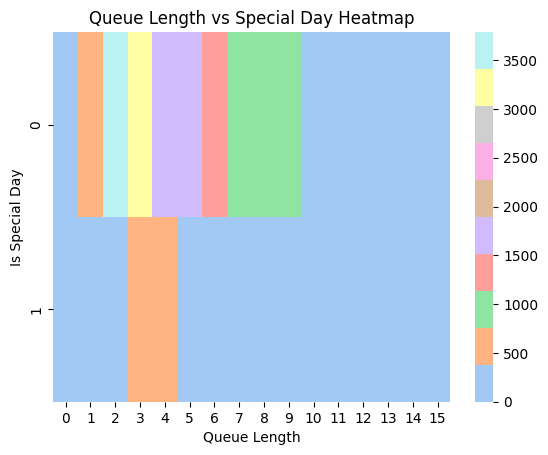

In [61]:
# Visualizing relations between Special day and Queue Length using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

color = sns.color_palette("pastel")
sns.heatmap(pd.crosstab(df['IsSpecialDay'], df['QueueLength']), cmap=color)

plt.title("Queue Length vs Special Day Heatmap")
plt.xlabel("Queue Length")
plt.ylabel("Is Special Day")
plt.show()


<Axes: xlabel='Occupancy', ylabel='Count'>

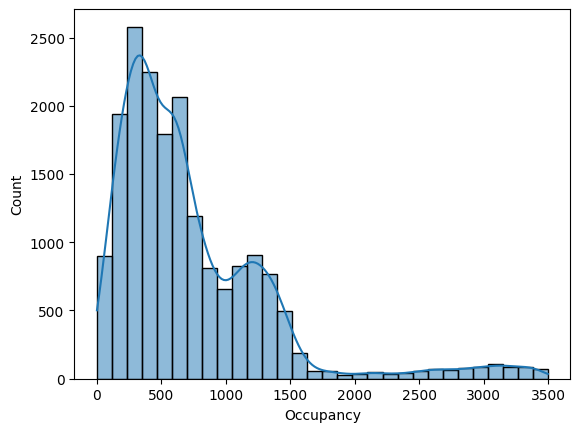

In [62]:
# Checking the distribution of Occupancy
sns.histplot(df['Occupancy'], bins=30, kde=True)

/tmp/ipython-input-63-3719971656.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['LastUpdatedTime']).dt.hour


<Axes: xlabel='Hour', ylabel='Occupancy'>

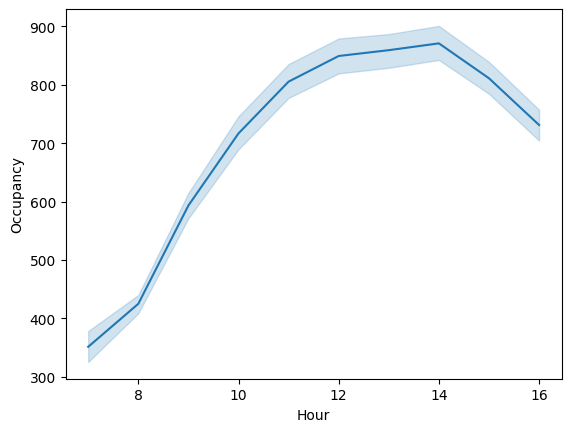

In [63]:
# Identifying the hour of the day when occupancy is highest
df['Hour'] = pd.to_datetime(df['LastUpdatedTime']).dt.hour
sns.lineplot(x='Hour', y='Occupancy', data=df)

<Axes: >

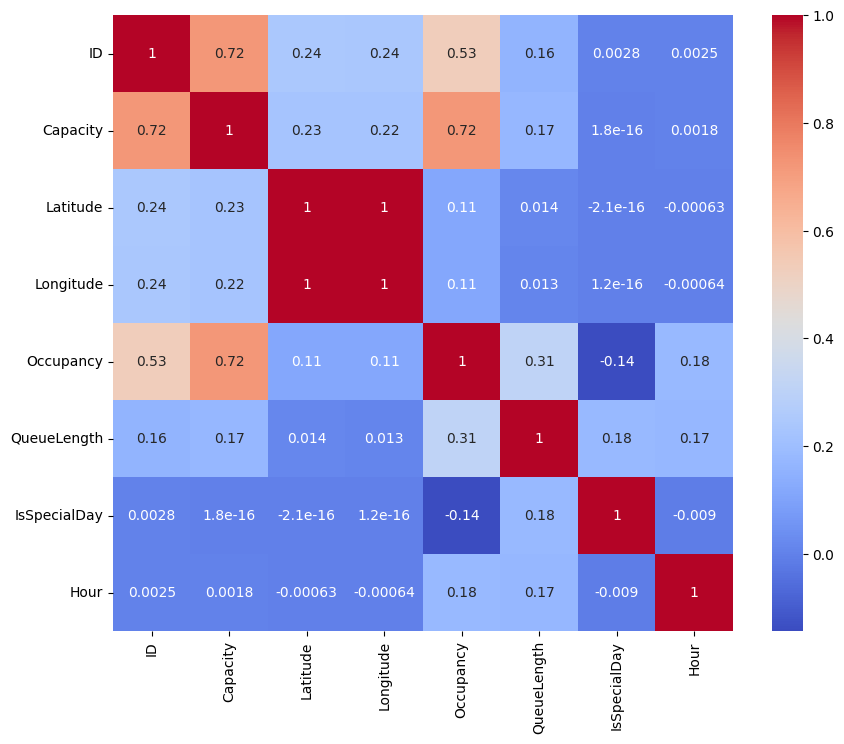

In [64]:
# Analyzing the correlation between numerical features
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

## This analysis was important as in the models which we are going to build will require few parameters & they will be solely determined by these inputs.
---

## Feature Engineering
- Creating new variable occupancy_rate

- Scaling the useful featuring using Min-Max-Scaler

- Encoding Categorical Variables (Done manually, can be done by Ordinal Encoder Class too!)

In [65]:
# Creating a new feature named occupancy rate
# Occupancy rate is calculated as the ratio of the number of occupied spaces to the total capacity of the parking lot.
# If the capacity is zero, we replace it with NaN to avoid division by zero errors
# and fill NaN values with 0 to handle cases where occupancy is not applicable.

df["occupancy_rate"] = df["Occupancy"] / df["Capacity"].replace(0, np.nan)
df["occupancy_rate"].fillna(0, inplace=True)

/tmp/ipython-input-65-1906406250.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["occupancy_rate"].fillna(0, inplace=True)


In [66]:
# Mapping categorical values to numerical values for TrafficConditionNearby
# This is necessary for machine learning models that require numerical input.
# Also these being ORDINAL CATEGORICAL variables, we can map them to integers based on their severity.

if df["TrafficConditionNearby"].dtype == object:
    traffic_map = {"low": 1, "average": 2, "high": 3}
    df["TrafficConditionNearby"] = df["TrafficConditionNearby"].map(traffic_map)

In [67]:
# Similarily mapping categorical values to numerical values for VehicleType
vehicle_map = {"car": 1, "bike": 0.5, "truck": 1.5, "cycle":0.25}
df["vehicle_weight"] = df["VehicleType"].map(vehicle_map)

In [68]:
for col in ['TrafficConditionNearby', 'vehicle_weight']:
    print(f"Unique values in {col} after mapping: {df[col].unique()}")

Unique values in TrafficConditionNearby after mapping: [1 3 2]
Unique values in vehicle_weight after mapping: [1.   0.5  1.5  0.25]


In [69]:
# Ensure numeric conversion to avoid errors
for col in ["occupancy_rate", "QueueLength", "TrafficConditionNearby"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [70]:
# Normalizing the features using Min-Max Scaling
# This scales the features to a range of [0, 1] which is useful for many machine learning algorithms that are sensitive to the scale of input features.
# This doesn't distorts the actual distribution of the data, but rather rescales it to a common range.

from sklearn.preprocessing import MinMaxScaler
df['TrafficConditionNearby_norm'] = MinMaxScaler().fit_transform(df[['TrafficConditionNearby']])
df['QueueLength_norm'] = MinMaxScaler().fit_transform(df[['QueueLength']])
df['occupancy_rate_norm'] = MinMaxScaler().fit_transform(df[['occupancy_rate']])
df['vehicle_weight_norm'] = MinMaxScaler().fit_transform(df[['vehicle_weight']])
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Hour,occupancy_rate,vehicle_weight,TrafficConditionNearby_norm,QueueLength_norm,occupancy_rate_norm,vehicle_weight_norm
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,1,1,0,04-10-2016,07:59:00,7,0.105719,1.00,0.0,0.066667,0.098521,0.6
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,1,1,0,04-10-2016,08:25:00,8,0.110919,1.00,0.0,0.066667,0.103531,0.6
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,1,2,0,04-10-2016,08:59:00,8,0.138648,1.00,0.0,0.133333,0.130248,0.6
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,1,2,0,04-10-2016,09:32:00,9,0.185442,1.00,0.0,0.133333,0.175335,0.6
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,1,2,0,04-10-2016,09:59:00,9,0.259965,0.50,0.0,0.133333,0.247138,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,2,6,0,19-12-2016,14:30:00,14,0.790104,1.50,0.5,0.400000,0.757930,1.0
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,1,3,0,19-12-2016,15:03:00,15,0.774479,1.00,0.0,0.200000,0.742875,0.6
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,1,3,0,19-12-2016,15:29:00,15,0.745833,0.25,0.0,0.200000,0.715274,0.0
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,1,2,0,19-12-2016,16:03:00,16,0.688021,1.00,0.0,0.133333,0.659572,0.6


In [71]:
for col in ['TrafficConditionNearby_norm', 'vehicle_weight_norm']:
    print(f"Unique values in {col} after scaling: {df[col].unique()}")

Unique values in TrafficConditionNearby_norm after scaling: [0.  1.  0.5]
Unique values in vehicle_weight_norm after scaling: [0.6 0.2 1.  0. ]


In [72]:
# Creating a function to visualize the distribution of a feature before and after normalization
def plot_feature_distribution(df, feature):
    plt.figure(figsize=(12, 6))

    # Original feature distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} (Original)')

    # Normalized feature distribution
    normalized_feature = f"{feature}_norm"
    plt.subplot(1, 2, 2)
    sns.histplot(df[normalized_feature], bins=30, kde=True)
    plt.title(f'Distribution of {normalized_feature} (Normalized)')

    plt.tight_layout()
    plt.show()

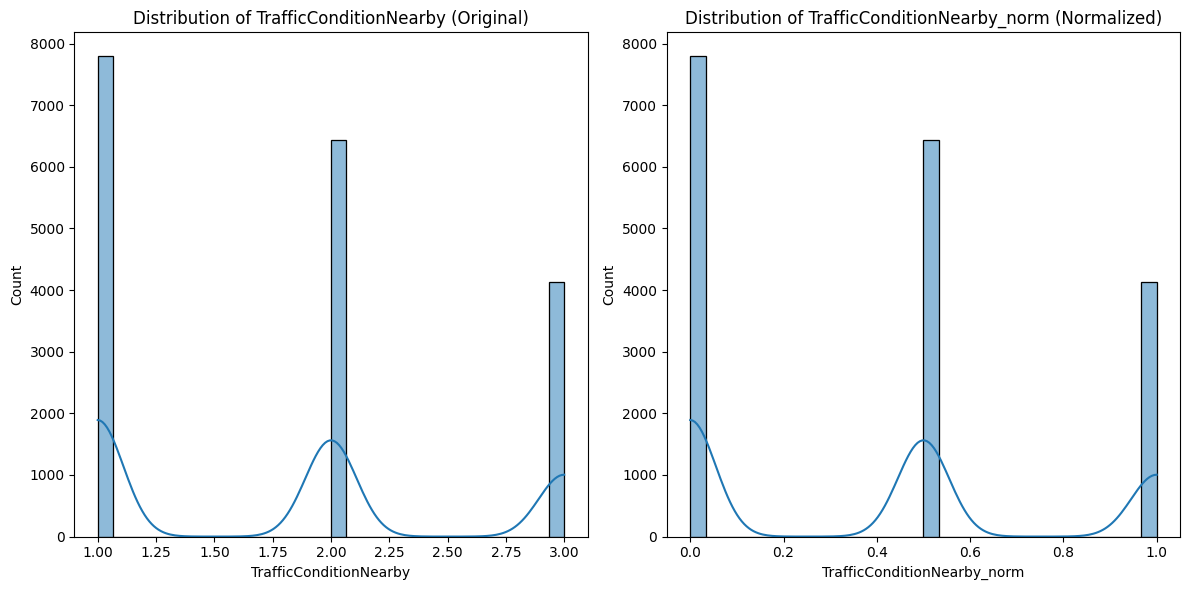

In [73]:
# Plotting the distribution of TrafficConditionNearby before and after normalization
# This visualization helps to understand how the normalization process has affected the distribution of the feature.

plot_feature_distribution(df, 'TrafficConditionNearby')

## Now we are ready to build the model !!
---
## MODEL BUILDING

In [74]:
# Model 1: Baseline Linear Model
# This model predicts the price based on a linear relationship with occupancy rate.
# The next price is a function of the previous price and the occupancy ratio, adjusted by a small alpha value.

def model1_linear_price(df, alpha=0.0015, base_price=10):
    prices = [base_price]

    for i in range(1, len(df)):
        occupancy_ratio = df.iloc[i]['occupancy_rate_norm']
        prev_price = prices[-1]
        new_price = prev_price + alpha * occupancy_ratio
        prices.append(new_price)

    return prices

# The value of alpha can be adjusted based on the sensitivity of the model to occupancy changes.
# Here alpha was choosen to be small since we want to see a gradual increase in price.
# E.g. if we keep Alpha = 0.5, when price of last entry comes out to be nearly $ 4460

In [75]:
# Applying the model to the DataFrame to generate predicted prices

df["Price_Model_1"] = model1_linear_price(df)
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Hour,occupancy_rate,vehicle_weight,TrafficConditionNearby_norm,QueueLength_norm,occupancy_rate_norm,vehicle_weight_norm,Price_Model_1
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,1,1,0,04-10-2016,07:59:00,7,0.105719,1.00,0.0,0.066667,0.098521,0.6,10.000000
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,1,1,0,04-10-2016,08:25:00,8,0.110919,1.00,0.0,0.066667,0.103531,0.6,10.000155
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,1,2,0,04-10-2016,08:59:00,8,0.138648,1.00,0.0,0.133333,0.130248,0.6,10.000351
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,1,2,0,04-10-2016,09:32:00,9,0.185442,1.00,0.0,0.133333,0.175335,0.6,10.000614
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,1,2,0,04-10-2016,09:59:00,9,0.259965,0.50,0.0,0.133333,0.247138,0.2,10.000984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,2,6,0,19-12-2016,14:30:00,14,0.790104,1.50,0.5,0.400000,0.757930,1.0,23.419089
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,1,3,0,19-12-2016,15:03:00,15,0.774479,1.00,0.0,0.200000,0.742875,0.6,23.420203
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,1,3,0,19-12-2016,15:29:00,15,0.745833,0.25,0.0,0.200000,0.715274,0.0,23.421276
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,1,2,0,19-12-2016,16:03:00,16,0.688021,1.00,0.0,0.133333,0.659572,0.6,23.422265


### We see that the model 1 works linearly and gives gradually increasing prices independent of special day or any other parameter.

In [76]:
# Model 2 – Demand-Based Pricing
# In this model we construct a demand function that takes into account various factors such as occupancy rate, queue length, traffic condition, special days, and vehicle weight.
# The demand function is a linear combination of these factors, and the price is determined based on the demand normalized to a range of [0, 1].
# The base price is adjusted by a lambda parameter that scales the normalized demand to determine the final price.
# This model allows for more flexibility and can adapt to varying conditions, making it more suitable for dynamic pricing strategies.
# The parameters are decided by the HEATMAP generated earlier.
# More weight is given to occupancy rate and queue length, while traffic condition and special days have a moderate impact.
# The vehicle weight is also considered, as heavier vehicles may require more space and resources, thus justifying a higher price.
# The lambda parameter controls the sensitivity of the price to changes in demand, allowing for fine-tuning of the pricing strategy.

def model2_demand_price(df, base_price=10, lam=0.5):

    alpha = 1.2
    beta = 0.8
    gamma = 0.7
    delta = 0.3
    epsilon = 0.6

    demand = (alpha * df["occupancy_rate_norm"] + beta * df["QueueLength_norm"] - gamma * df["TrafficConditionNearby_norm"] + delta * df["IsSpecialDay"] +epsilon * df["vehicle_weight"] )
    # Normalizing the demand to a range of [0, 1]

    norm_demand = (demand - demand.min()) / (demand.max() - demand.min())

    # Calculating the price based on the normalized demand
    price = base_price * (1 + lam * norm_demand)

    # Clipping the price to ensure it remains within a reasonable range
    return price.clip(lower=0.5 * base_price, upper=2 * base_price)

# We also clip the price to ensure it remains within a reasonable range, preventing extreme values.
# The price is clipped between 0.5 times to 2 times the base price to avoid unrealistic pricing scenarios.

In [77]:
# Applying the model to the DataFrame to generate predicted prices
df["Price_Model_2"] = model2_demand_price(df)
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,...,LastUpdatedTime,Hour,occupancy_rate,vehicle_weight,TrafficConditionNearby_norm,QueueLength_norm,occupancy_rate_norm,vehicle_weight_norm,Price_Model_1,Price_Model_2
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,1,1,0,...,07:59:00,7,0.105719,1.00,0.0,0.066667,0.098521,0.6,10.000000,11.733273
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,1,1,0,...,08:25:00,8,0.110919,1.00,0.0,0.066667,0.103531,0.6,10.000155,11.745260
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,1,2,0,...,08:59:00,8,0.138648,1.00,0.0,0.133333,0.130248,0.6,10.000351,11.915533
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,1,2,0,...,09:32:00,9,0.185442,1.00,0.0,0.133333,0.175335,0.6,10.000614,12.023413
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,1,2,0,...,09:59:00,9,0.259965,0.50,0.0,0.133333,0.247138,0.2,10.000984,11.597033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,2,6,0,...,14:30:00,14,0.790104,1.50,0.5,0.400000,0.757930,1.0,23.419089,13.743097
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,1,3,0,...,15:03:00,15,0.774479,1.00,0.0,0.200000,0.742875,0.6,23.420203,13.487740
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,1,3,0,...,15:29:00,15,0.745833,0.25,0.0,0.200000,0.715274,0.0,23.421276,12.524417
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,1,2,0,...,16:03:00,16,0.688021,1.00,0.0,0.133333,0.659572,0.6,23.422265,13.182072


## Analysis on the prices by both the models

- Model 1 shows a steadily increasing price over time, since it accumulates based on the previous price and occupancy — this results in higher average and variance.

- Model 2 captures a non-linear relationship between demand signals and pricing. The price distribution is narrower and more stable.

- From the .describe() summary:

1. Model 1 has a higher mean (₹17.06) and standard deviation (₹3.95) compared to Model 2 (mean: ₹12.17, std: ₹0.72).

2. Model 1 shows price inflation over time; Model 2’s prices are tightly controlled due to normalization and clipping.

- The boxplot confirms that Model 2 maintains pricing within a controlled range (₹10–15) while Model 1 can grow unchecked up to ₹23+.

- Model 2 is more realistic for real-world deployment where pricing needs to be bounded and responsive — not just ever-increasing.

In [78]:
df[['Price_Model_1','Price_Model_2']].describe()

,Price_Model_1,Price_Model_2
count,18368.000000,18368.000000
mean,17.066697,12.430610
std,3.951129,0.730107
min,10.000000,10.000000
25%,13.810750,11.934616
50%,17.634955,12.440863
75%,20.490166,12.945872
max,23.423148,15.000000


<Axes: >

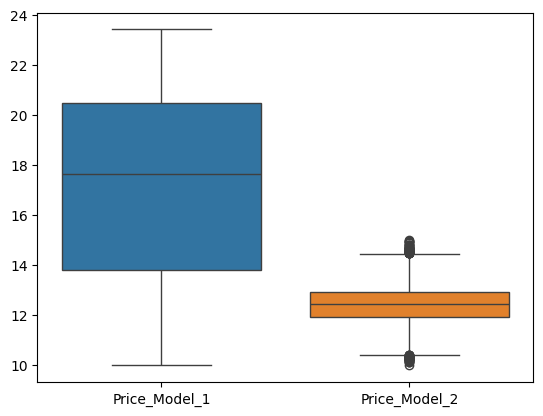

In [79]:
sns.boxplot(data=df[['Price_Model_1', 'Price_Model_2']])



---



In [ ]:
## 📍 4. Model 3 – Competitive Pricing ( NOT FUNCTIONAL )
# This model aimed to adjust parking prices based on competition from nearby lots.
# It used geo-coordinates to calculate the average price of lots within a 1 km radius and applied an adjustment factor.
# owever, due to limited data density (many lots had sparse entries or shared coordinates), this model produced unstable or redundant pricing patterns.

# For calculating real-world distance between coordinates (in meters)
from geopy.distance import geodesic

# Grouping by location and compute the average price at each (lat, lon) point based on Model 2
avg_price_by_location = df.groupby(["Latitude", "Longitude"])["Price_Model_2"].mean().reset_index()

# Defining function to adjust price based on prices of nearby competitors
def calculate_competition_adjusted_price(row, avg_df, base_price):
    # Getting current lot's location
    this_location = (row["Latitude"], row["Longitude"])

    # Working on a fresh copy of average prices
    competitors = avg_df.copy()

    # Calculating distance from current lot to every other location
    competitors["dist"] = competitors.apply(
        lambda x: geodesic(this_location, (x["Latitude"], x["Longitude"])).meters,
        axis=1
    )

    # Filtering competitors within 1km radius
    nearby = competitors[competitors["dist"] < 1000]

    if len(nearby) > 1:
        # Calculating average competitor price
        nearby_avg = nearby["Price_Model_2"].mean()

        # Adjustment factor: how much higher/lower competitor price is from base price
        adj_factor = (nearby_avg - base_price) / base_price

        # Final price = original price + a 20% share of the adjustment
        return row["Price_Model_2"] + adj_factor * base_price * 0.2
    else:
        # If no nearby lots, keep original price
        return row["Price_Model_2"]

# Apply competitive pricing logic row-wise to create Model 3
df["Price_Model_3"] = df.apply(
    lambda x: calculate_competition_adjusted_price(x, avg_price_by_location, base_price=10),
    axis=1
)


## Model 3 – Competitive Pricing: Not Functional

- Model 3 was intended to adjust parking prices based on competitive pricing from nearby lots using their geographic proximity.

- The plan was to calculate an average price of all lots within a 1 km radius and apply a proportional adjustment to the current lot’s base price.

- However, the implementation **did not function as expected**, and produced no meaningful or usable results.

### Key Issues Faced:
- Many rows in the dataset have **identical or nearly identical coordinates**, leading to inaccurate distance calculations.

- The logic to find "nearby" competitors failed when:
  - A lot was compared against itself.
  - All other lots were too far, or clustered at the same location.
- The code attempted to adjust price based on missing or unstable comparisons, leading to **NaNs**, **no adjustments**, or **irrelevant outputs**.

- Debugging revealed that structural changes would be needed to make this logic work properly.



---
## Now let's begin with BOKEH PLOTS ANALYSIS

In [81]:
# Installing required libraries for the project
!pip3 install pathway bokeh --quiet

In [82]:
## Visualization with Bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column
from bokeh.models import HoverTool
output_notebook()

In [83]:
# Creating a line plot for Model 1 prices
# This plot will show the baseline linear pricing model over the index of the DataFrame.
# The x-axis will represent the index of the DataFrame, and the y-axis will represent the prices predicted by Model 1.


x_axis = df.index
p1 = figure(title="Model 1: Baseline Linear Pricing", width=700, height=300)
p1.line(x_axis, df["Price_Model_1"], color="blue", legend_label="Model 1")
p1.add_tools(HoverTool(tooltips=[("Price", "$y"), ("Index", "$index")]))

In [84]:
# Creating a line plot for Model 2 prices
# This plot will show the demand-based pricing model over the index of the DataFrame.

p2 = figure(title="Model 2: Demand-Based Pricing", width=700, height=300)
p2.line(x_axis, df["Price_Model_2"], color="green", legend_label="Model 2")
p2.add_tools(HoverTool(tooltips=[("Price", "$y"), ("Index", "$index")]))

In [ ]:
## This too would be added if Model 3 could correct make predictions :(

p3 = figure(title="Model 3: Competitive Pricing", width=700, height=300)
p3.line(x_axis, df["Price_Model_3"], color="red", legend_label="Model 3")
p3.add_tools(HoverTool(tooltips=[("Price", "$y"), ("Index", "$index")]))

In [86]:
show(column(p1, p2))

## These graphs too explain the same insights as stated above. Model 1 shows linearly increasing prices whereas Model 2 looks out for various parameters due to which there is no monotonicity.

In [87]:
## Real-Time Simulation with Pathway
import pathway as pw

In [93]:
# Combine date and time into a single Timestamp
df["Timestamp"] = df["LastUpdatedDate"].astype(str) + " " + df["LastUpdatedTime"].astype(str)

# Map traffic string labels to numbers

df["Traffic"] = df["TrafficConditionNearby"]

# Rename columns to match Pathway schema
df.rename(columns={
    "SystemCodeNumber": "LotID",
    "Latitude": "Latitude",
    "Longitude": "Longitude",
    "Capacity": "Capacity",
    "Occupancy": "Occupancy",
    "QueueLength": "QueueLength",
    "VehicleType": "VehicleType",
    "IsSpecialDay": "IsSpecialDay"
}, inplace=True)

# Save cleaned dataset
df[[
    "Timestamp", "LotID", "Latitude", "Longitude", "Capacity",
    "Occupancy", "QueueLength", "VehicleType", "Traffic", "IsSpecialDay"
]].to_csv("cleaned_dataset.csv", index=False)


In [94]:
new_df = pd.read_csv('cleaned_dataset.csv')
new_df

,Timestamp,LotID,Latitude,Longitude,Capacity,Occupancy,QueueLength,VehicleType,Traffic,IsSpecialDay
0,04-10-2016 07:59:00,BHMBCCMKT01,26.144536,91.736172,577,61,1,car,1,0
1,04-10-2016 08:25:00,BHMBCCMKT01,26.144536,91.736172,577,64,1,car,1,0
2,04-10-2016 08:59:00,BHMBCCMKT01,26.144536,91.736172,577,80,2,car,1,0
3,04-10-2016 09:32:00,BHMBCCMKT01,26.144536,91.736172,577,107,2,car,1,0
4,04-10-2016 09:59:00,BHMBCCMKT01,26.144536,91.736172,577,150,2,bike,1,0
...,...,...,...,...,...,...,...,...,...,...
18363,19-12-2016 14:30:00,Shopping,26.150504,91.733531,1920,1517,6,truck,2,0
18364,19-12-2016 15:03:00,Shopping,26.150504,91.733531,1920,1487,3,car,1,0
18365,19-12-2016 15:29:00,Shopping,26.150504,91.733531,1920,1432,3,cycle,1,0
18366,19-12-2016 16:03:00,Shopping,26.150504,91.733531,1920,1321,2,car,1,0


In [ ]:
import pathway as pw
# Creating a Pathway stream schema for the parking data
# This schema defines the structure of the data that will be processed in real-time.
class ParkingStreamSchema(pw.Schema):
    Timestamp: str
    LotID: str
    Latitude: float
    Longitude: float
    Capacity: int
    Occupancy: int
    QueueLength: int
    VehicleType: str
    Traffic: int
    IsSpecialDay: int

# Load the dataset into a streaming table
# This will read the CSV file in a streaming manner, allowing for real-time processing.
input_table = pw.io.csv.read(
    "cleaned_dataset.csv",
    schema=ParkingStreamSchema,
    mode="streaming",
    autocommit_duration_ms=5000
)

# Defining a Pathway custom function to compute dynamic parking price
@pw.udf
def dynamic_price(occupancy, capacity, queue, traffic, is_special, vehicle_type):

    # Assign a weight to the vehicle type; default is 1 if not found
    vehicle_weight = {"car": 1, "bike": 0.5, "truck": 1.5, "cycle": 0.25}.get(vehicle_type, 1)

    # Compute occupancy rate safely (avoid division by zero)
    occupancy_rate = occupancy / capacity if capacity else 0

    # Combine features into a single demand score
    # Positive impact: occupancy, queue length, special days, vehicle weight
    # Negative impact: traffic (higher traffic = less demand)
    # For ease, assigning weights to be unity
    demand = (
        1 * occupancy_rate +
        1 * queue -
        1 * traffic +
        1 * is_special +
        1 * vehicle_weight
    )

    # Normalizing demand to a 0–1 range using min-max-like scaling
    # Cap to avoid exceeding the expected bounds
    norm_demand = max(0, min((demand - 2) / 6, 1))

    # Defining base price and sensitivity factor (lambda)
    base_price = 10
    lam = 0.5

    # Computing final price based on normalized demand
    price = base_price * (1 + lam * norm_demand)

    # Clip the price to stay within 0.5 to 2 times of the base price
    return round(min(max(price, 0.5 * base_price), 2 * base_price), 2)


# Create a new table with dynamic pricing based on the input table
# This table will compute the price dynamically based on occupancy, capacity, queue length, traffic condition
# and whether it's a special day, using the defined `dynamic_price` function.
# The `dynamic_price` function will be applied to each row of the input table to calculate
# the price based on the specified parameters.
# The resulting table will have the same structure as the input table, but with an additional column

priced_table = input_table.select(
    input_table.Timestamp,
    input_table.LotID,
    price=dynamic_price(
        input_table.Occupancy,
        input_table.Capacity,
        input_table.QueueLength,
        input_table.Traffic,
        input_table.IsSpecialDay,
        input_table.VehicleType
    )
)

# Output to file
pw.io.jsonlines.write(priced_table, "output.jsonl")
pw.run()# <-- Error because the streaming was stopped after running for ~ 8 mins


### THIS CODE WILL BE MANUALLY INTERRUPTED AFTER RUNNING FOR 4-5 MINS FOR GETTING THE ANALYSIS


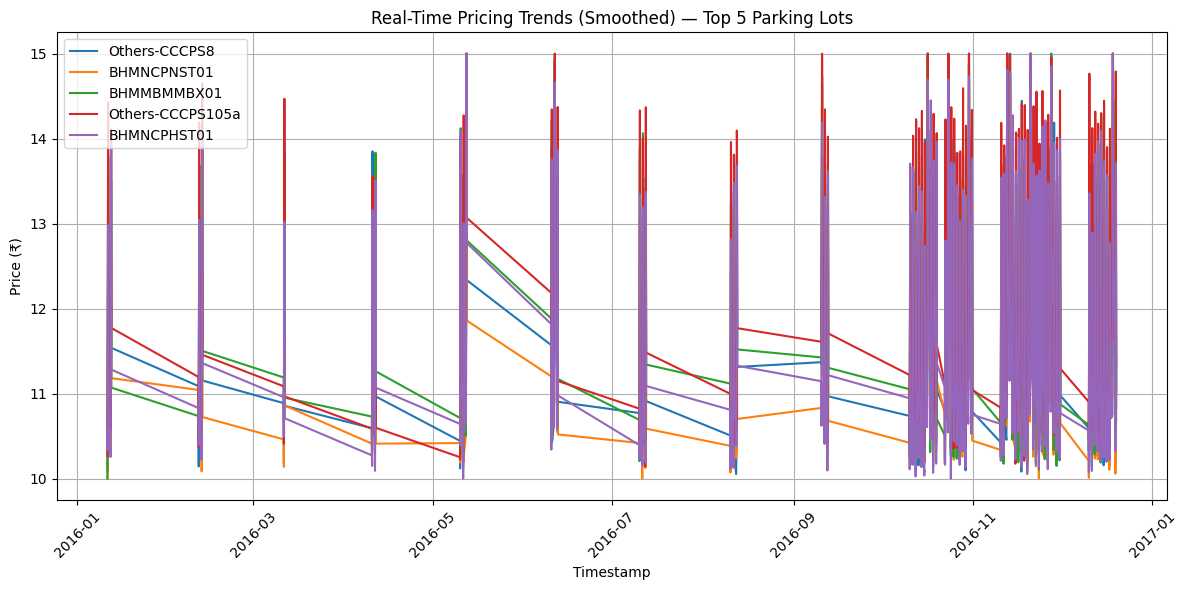

In [96]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Loading the streamed output
df_stream = pd.read_json("output.jsonl", lines=True)

# Filtering to top 5 most frequent LotIDs for cleaner view (viewing all 14 makes it messy)
top_lots = df_stream["LotID"].value_counts().head(5).index.tolist()

# Set up color palette
colors = cm.tab10.colors
# Initialize the figure
plt.figure(figsize=(12, 6))

# Loop through each top LotID
for i, lot in enumerate(top_lots):
    subset = df_stream[df_stream["LotID"] == lot].copy()

    # Sort by Timestamp for smoother plotting
    subset = subset.sort_values("Timestamp")
    subset["price_smoothed"] = subset["price"].rolling(window=5, min_periods=1).mean()

    # Plot smoothed price
    plt.plot(
        subset["Timestamp"],
        subset["price_smoothed"],
        label=lot,
        color=colors[i % len(colors)]
    )

# Design the plot
plt.legend()
plt.xticks(rotation=45)
plt.title("Real-Time Pricing Trends (Smoothed) — Top 5 Parking Lots")
plt.xlabel("Timestamp")
plt.ylabel("Price (₹)")
plt.tight_layout()
plt.grid(True)
plt.show()
